In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [7]:
df = pd.read_csv('voice.csv')
df.head() 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [9]:
df.isnull().sum()


meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [74]:
df.dtypes


meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [11]:
d1 = df['label'].value_counts()
d1

male      1584
female    1584
Name: label, dtype: int64

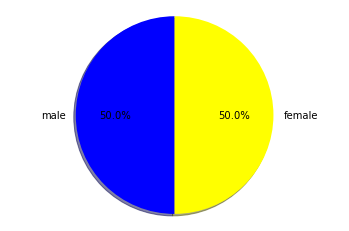

In [77]:
labels = 'male', 'female'
sizes = [1584,1584]
colors = ['blue','yellow']
plt.pie(sizes, labels=labels, colors=colors, autopct = '%1.1f%%', shadow =True, startangle = 90 )
plt.axis('equal')
plt.show()   


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]
print(x.shape,y.shape)
print(type(x),type(y))

(3168, 19) (3168,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [21]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.20)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(2534, 19)
(634, 19)
(2534,)
(634,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
def apply_model(model):
    model.fit(x_tr,y_tr)
    print('Accuracy',model.score(x_te,y_te))
    ypred = model.predict(x_te)
    print('Predicted values\n',ypred)
    cm = confusion_matrix(y_te,ypred)
    print('Confusion Matrix\n',cm)
    sns.heatmap(cm,annot=True)
    plt.show()
    print('Classification report\n',classification_report(y_te,ypred))

C:\Users\bidyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.889589905362776
Predicted values
 ['female' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'female' 'fema

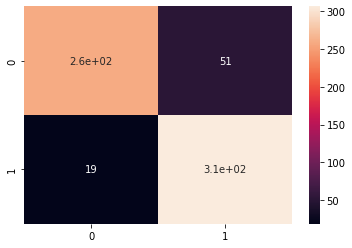

Classification report
               precision    recall  f1-score   support

      female       0.93      0.83      0.88       309
        male       0.86      0.94      0.90       325

    accuracy                           0.89       634
   macro avg       0.89      0.89      0.89       634
weighted avg       0.89      0.89      0.89       634



In [26]:
# 1) LogReg
m1 = LogisticRegression()
apply_model(m1)

Accuracy 0.9700315457413249
Predicted values
 ['female' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'female'
 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'male'
 'female' 'female' 'female' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'female'

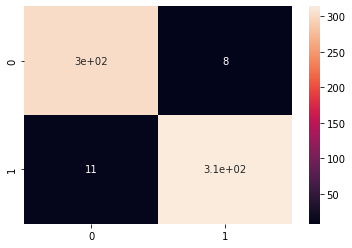

Classification report
               precision    recall  f1-score   support

      female       0.96      0.97      0.97       309
        male       0.98      0.97      0.97       325

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [27]:
# 2) Decision Tree
m2 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m2)

Accuracy 0.9763406940063092
Predicted values
 ['female' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female'
 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'male' 'female' 'female' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'female'
 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'female' 'fe

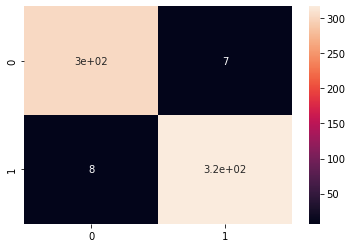

Classification report
               precision    recall  f1-score   support

      female       0.97      0.98      0.98       309
        male       0.98      0.98      0.98       325

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [44]:
# 3) Random Forest
m3 = RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m3)

Accuracy 0.916403785488959
Predicted values
 ['female' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'female' 'female

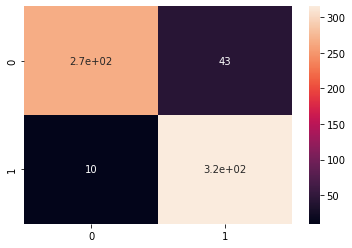

Classification report
               precision    recall  f1-score   support

      female       0.96      0.86      0.91       309
        male       0.88      0.97      0.92       325

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



In [46]:
# 4) SVC
m4 = SVC(kernel='linear',C=1)
apply_model(m4)


Accuracy 0.695583596214511
Predicted values
 ['female' 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'female' 'female' 'male' 'female' 'male' 'female' 'female' 'female'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'female' 'male'

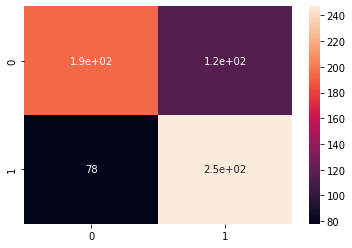

Classification report
               precision    recall  f1-score   support

      female       0.71      0.63      0.67       309
        male       0.68      0.76      0.72       325

    accuracy                           0.70       634
   macro avg       0.70      0.69      0.69       634
weighted avg       0.70      0.70      0.69       634



In [47]:
# 5) KNN
m5 = KNeighborsClassifier(n_neighbors=27)
apply_model(m5)

In [65]:
print("The best model for this Gender Detection Mini Project is 'Random Forest Classifier Model' with an accuracy of 0.9763406940063092 ")

The best model for this Gender Detection Mini Project is 'Random Forest Classifier Model' with an accuracy of 0.9763406940063092 
